# <center>CENTRO UNIVERSITÁRIO SENAC<br>PÓS-GRADUAÇÃO EM INTELIGÊNCIA ARTIFICIAL</center>
## <center>SISTEMAS DE APOIO À TOMADA DE DECISÃO</center>
### <center>PROJETO DESAFIO - ANÁLISE DE RISCO DE CRÉDITO</center>
#### GRUPO:
- Eduardo Albino Gonelli
- Matheus Kiss
- Rafael Marcos Tomé
- Renato Lins da Palma

### <center>DESCRIÇÃO DA SITUAÇÃO PROBLEMA</center>
Quando um banco recebe um pedido de empréstimo, com base no perfil do solicitante, o banco deve tomar uma decisão sobre a aprovação ou não do empréstimo- Dois tipos de riscos estão associados à decisão do banco:

- Se o cliente tem uma boa avaliação de risco de crédito, é provável que pague o empréstimo, então não aprovar o empréstimo para essa pessoa acaba resultando em perda de negócios para o banco;
- Por outro lado, se o cliente não possuir uma boa avaliação de risco, isso significa que, provavelmente, não pagará o empréstimo- A conclusão óbvia neste caso é de que a aprovação do empréstimo à pessoa resultará em uma perda financeira para o banco.

Com base no que foi exposto, é evidente a importância para qualquer instituição financeira ser capaz de avaliar de maneira acurada os riscos de quaisquer decisões acerca da concessão ou não de crédito.
### <center>PROPOSTA DE SOLUÇÃO</center>
Com base na situação problema e nos conceitos trabalhados na disciplina, cada grupo deve utilizar a base fornecida pelo professor para propor uma solução utilizando Inteligência Artificial para avaliar, classificar e predizer, com os maiores (e mais adequados) índices de desempenho possíveis, a credibilidade dos clientes.

In [1]:
#Author: Eduardo Albino Gonelli
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importando o dataset fornecido pelo professor. Dataset original disponível em: 
# https://www.kaggle.com/datasets/mpwolke/cusersmarildownloadsgermancsv
data = pd.read_csv('german.csv', sep = ";")
data.head(5)

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


### ANÁLISE DOS DADOS

In [3]:
# verificando se existem dados nulos
data = data.iloc[:, 0:]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account_Balance                    1000 non-null   int64
 2   Duration_of_Credit_monthly         1000 non-null   int64
 3   Payment_Status_of_Previous_Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit_Amount                      1000 non-null   int64
 6   Value_Savings_Stocks               1000 non-null   int64
 7   Length_of_current_employment       1000 non-null   int64
 8   Instalment_per_cent                1000 non-null   int64
 9   Sex_Marital_Status                 1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration_in_Current_address        1000 non-null   int64
 12  Most_valuable_availab

In [4]:
data.describe()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,...,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,...,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,...,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [5]:
print("Shape", data.shape)

Shape (1000, 21)


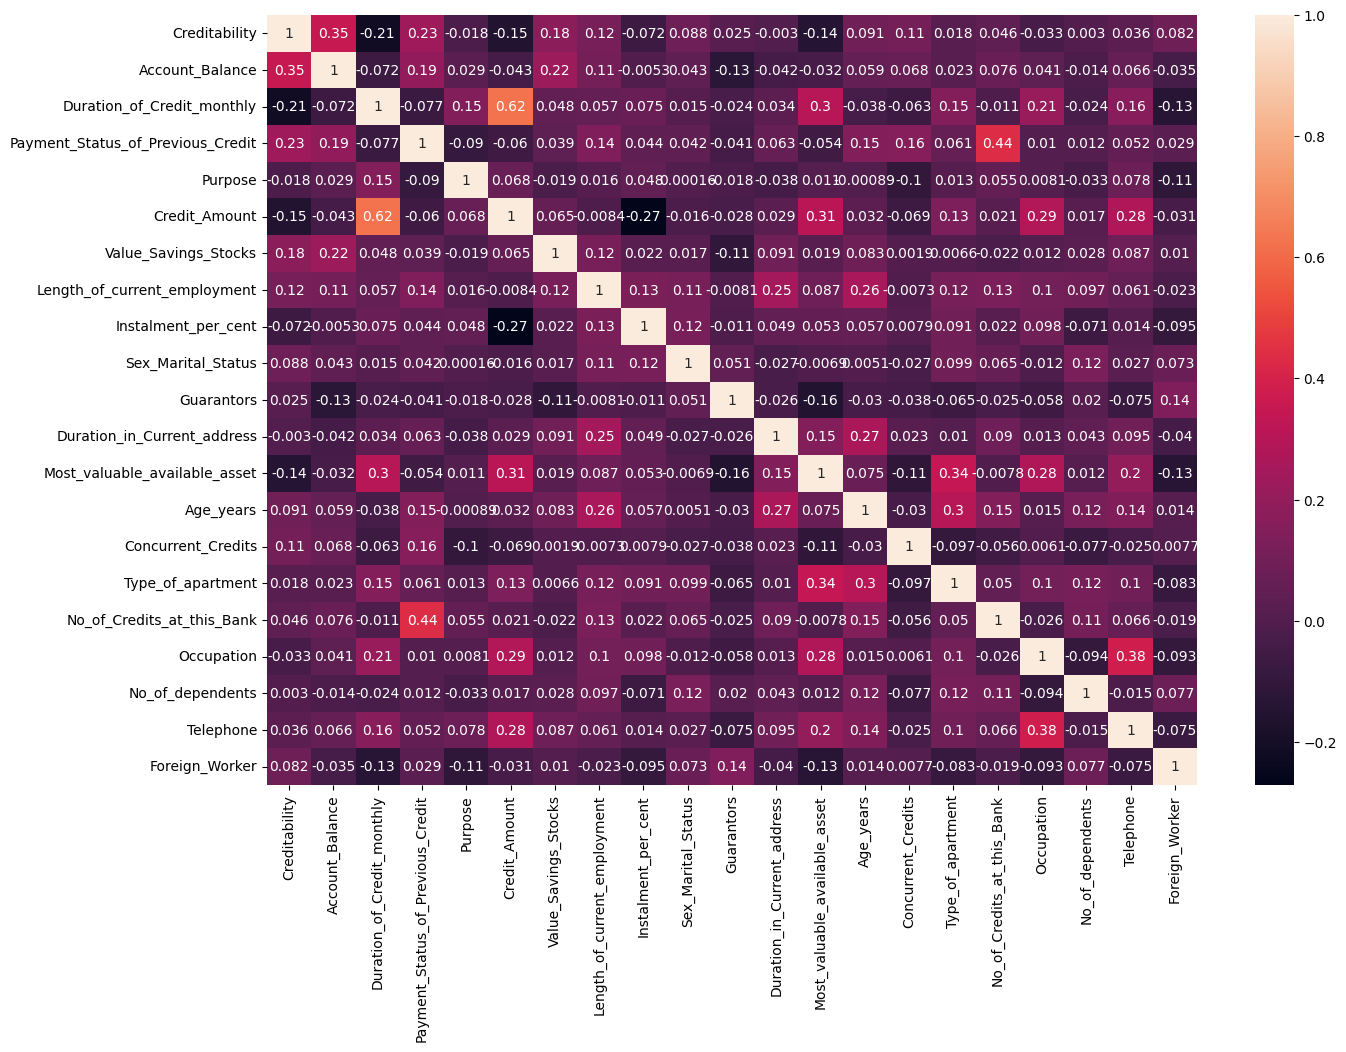

In [6]:
# análise de correlação entre os dados
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

Neste trabalho realizamos estudos com:
- Regressão Logística;
- Random Forests;
- k-NN; e
- Gradient Boosting Machines. (X-GBoost)

## PRIMEIRO ESTUDO - REGRESSÃO LOGÍSTICA

In [7]:
# Fonte: 
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

# imports
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

### CASO 1 - TESTE DE REGRESSÃO LOGÍSTICA COM TODAS AS FEATURES
Neste caso de teste preservamos todas as features para ver se os dados se adequam corretamente ao modelo. Utilizamos também algumas métricas como Acurácia de Teste e Validação, Matriz de Confusão, Acurácia de Validação Cruzada e Curva ROC.

In [8]:
# queremos prever a coluna 'Creditability', então separamos ela para y 'label', enquanto o restante dos dados ficam em X
X = data.drop('Creditability', axis=1)
y = data['Creditability']

In [9]:
# separação da base de treinamento da base de testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
# treinamento
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
# previsão de testes
y_pred_train = logistic_model.predict(X_train)
y_pred_test = logistic_model.predict(X_test)

In [12]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [13]:
# análise de acurácia
print("Acurácia de treinamento: ", accuracy_train,". Acurácia de teste: ", accuracy_test)

Acurácia de treinamento:  0.76375 . Acurácia de teste:  0.75


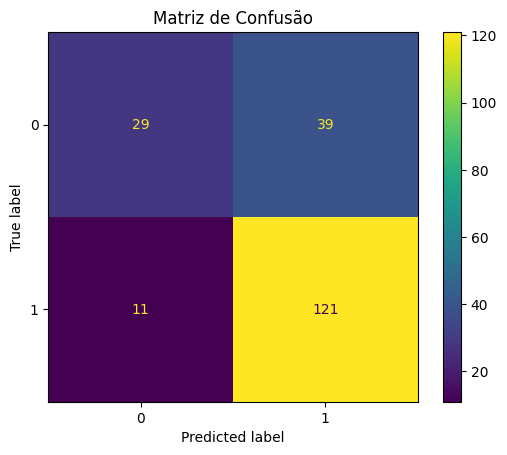

In [14]:
# matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_test)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Matriz de Confusão')
plt.show()

É possível observar que a previsão de True Positives (124) foi muito boa, mas o False Positive também foi alto (40). Já o False Negative foi baixo e aceitável (8).

In [15]:
# calculando os scores com validação cruzada
# Calcule os scores de validação cruzada (usando acurácia como métrica)
scores = cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy')

# Calcule a média e o desvio padrão dos scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Exiba os resultados
print(f'Acurácia média na validação cruzada: {mean_score}')
print(f'Desvio padrão da acurácia na validação cruzada: {std_score}')

Acurácia média na validação cruzada: 0.735
Desvio padrão da acurácia na validação cruzada: 0.07943550843294202


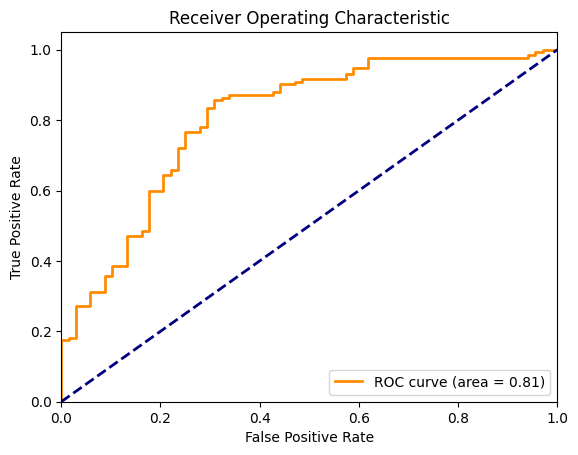

In [16]:
# Calcular a curva ROC
y_prob = logistic_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular o AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### CASO 2 - SELEÇÃO DE FEATURES POR IMPORTÂNCIA NA MATRIZ DE CORRELAÇÃO
As features com menor valor de correlação (próximo de zero) foram removidas para o treinamento e teste ('Duration_in_Current_address', 'No_of_dependents', 'Purpose' e 'Type_of_apartment'). Interessante observar que os resultados foram semelhantes ao CASO 1.

In [17]:
# realizar o drop de algumas features como descritas nos exemplos acima
columns_to_drop = ['Creditability', 'Duration_in_Current_address', 'No_of_dependents', 'Purpose', 'Type_of_apartment']
X2 = data.drop(columns_to_drop, axis=1)
y2 = data['Creditability']

In [18]:
# separação da base de treinamento da base de testes
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

In [19]:
# treinamento
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X2_train, y2_train)

LogisticRegression(max_iter=1000)

In [20]:
# previsão de testes
y2_pred_train = logistic_model.predict(X2_train)
y2_pred_test = logistic_model.predict(X2_test)

In [21]:
accuracy_train = accuracy_score(y2_train, y2_pred_train)
accuracy_test = accuracy_score(y2_test, y2_pred_test)

In [22]:
# análise de acurácia
print("Acurácia de treinamento: ", accuracy_train,". Acurácia de teste: ", accuracy_test)

Acurácia de treinamento:  0.76 . Acurácia de teste:  0.76


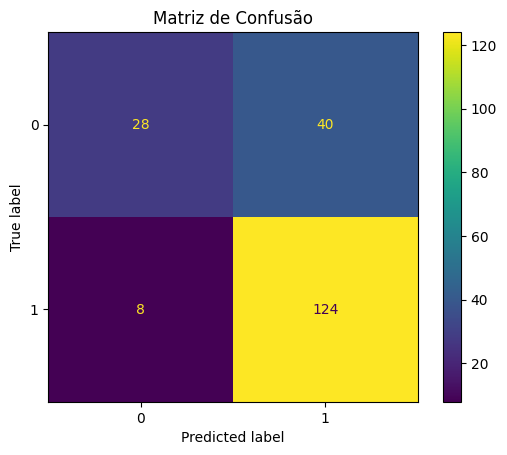

In [23]:
# matriz de confusão
conf_matrix = confusion_matrix(y2_test, y2_pred_test)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Matriz de Confusão')
plt.show()

In [24]:
# calculando os scores com validação cruzada
# Calcule os scores de validação cruzada (usando acurácia como métrica)
scores = cross_val_score(logistic_model, X2, y2, cv=5, scoring='accuracy')

# Calcule a média e o desvio padrão dos scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Exiba os resultados
print(f'Acurácia média na validação cruzada: {mean_score}')
print(f'Desvio padrão da acurácia na validação cruzada: {std_score}')

Acurácia média na validação cruzada: 0.74
Desvio padrão da acurácia na validação cruzada: 0.07543208866258447


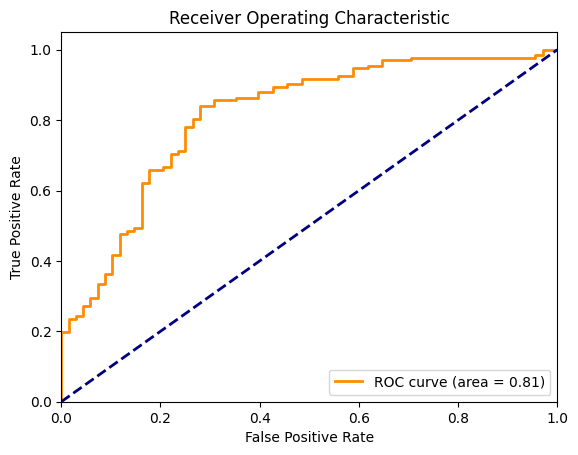

In [25]:
# Calcular a curva ROC
y2_prob = logistic_model.predict_proba(X2_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y2_test, y2_prob)

# Calcular o AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### CASO 3 - REMOÇÃO DE FEATURES E ANÁLISE DE IMPACTO NO MODELO
Neste caso foram removidas feature a feature, procurando aquelas que impactavam positivamente ou negativamente o modelo. A única feature que impactava negativamente, independente do cenário analisado, era a 'Duration_of_Credit_monthly'. Com a remoção desta feature houve uma ligeira melhora no aumento do True Negative e redução do False Positive.

In [26]:
columns_to_drop2 = ['Creditability', 'Duration_of_Credit_monthly']
X3 = data.drop(columns_to_drop2, axis=1)
y3 = data['Creditability']

In [27]:
# separação da base de treinamento da base de testes
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=0)

In [28]:
# treinamento
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X3_train, y3_train)

LogisticRegression(max_iter=1000)

In [29]:
# previsão de testes
y3_pred_train = logistic_model.predict(X3_train)
y3_pred_test = logistic_model.predict(X3_test)

In [30]:
accuracy_train = accuracy_score(y3_train, y3_pred_train)
accuracy_test = accuracy_score(y3_test, y3_pred_test)

In [31]:
# análise de acurácia
print("Acurácia de treinamento: ", accuracy_train,". Acurácia de teste: ", accuracy_test)

Acurácia de treinamento:  0.77 . Acurácia de teste:  0.75


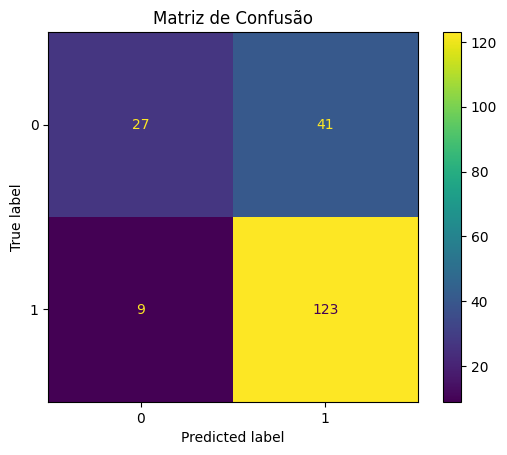

In [32]:
# matriz de confusão
conf_matrix = confusion_matrix(y3_test, y3_pred_test)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Matriz de Confusão')
plt.show()

In [33]:
# calculando os scores com validação cruzada
# Calcule os scores de validação cruzada (usando acurácia como métrica)
scores = cross_val_score(logistic_model, X3, y3, cv=5, scoring='accuracy')

# Calcule a média e o desvio padrão dos scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Exiba os resultados
print(f'Acurácia média na validação cruzada: {mean_score}')
print(f'Desvio padrão da acurácia na validação cruzada: {std_score}')

Acurácia média na validação cruzada: 0.727
Desvio padrão da acurácia na validação cruzada: 0.08053570636680356


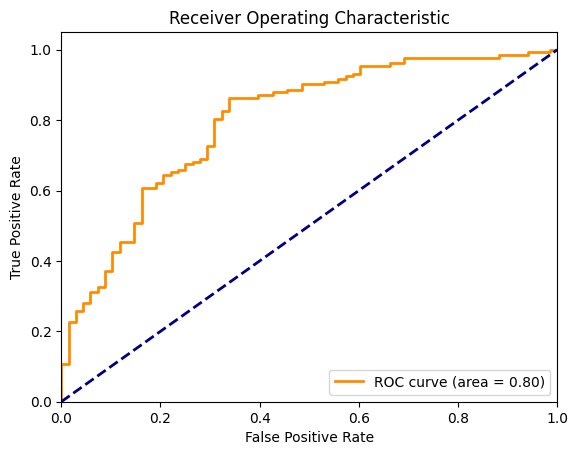

In [34]:
# Calcular a curva ROC
y3_prob = logistic_model.predict_proba(X3_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y3_test, y3_prob)

# Calcular o AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### CASO 4 - SELEÇÃO AUTOMÁTICA DE FEATURES UTILIZANDO SELECTKBEST DO SCIKIT-LEARN
No intuito de tentar entender melhor o que acontece com o modelo, foram estudadas técnicas de seleção automática de features. A selecção SelectKBest foi utilizada nesse caso de teste e o resultado foi muito semelhante ao exemplo anterior. O total de features selecionadas, para o melhor resultado encontrado, foi 12.

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X4 = data.drop('Creditability', axis=1)
y4 = data['Creditability']
# Selecionando as top 10 características
selector = SelectKBest(score_func=chi2, k=12)
X_new = selector.fit_transform(X4, y4)


In [36]:
# verificação das features que foram usadas
mask = selector.get_support()

# Obter os nomes das características selecionadas
selected_features = X4.columns[mask]

print("Características selecionadas:")
print(selected_features)

Características selecionadas:
Index(['Account_Balance', 'Duration_of_Credit_monthly',
       'Payment_Status_of_Previous_Credit', 'Purpose', 'Credit_Amount',
       'Value_Savings_Stocks', 'Length_of_current_employment',
       'Instalment_per_cent', 'Sex_Marital_Status',
       'Most_valuable_available_asset', 'Age_years', 'Concurrent_Credits'],
      dtype='object')


In [37]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X_new, y4, test_size=0.2, random_state=0)

In [38]:
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(X4_train, y4_train)

LogisticRegression(max_iter=2000)

In [39]:
y4_pred_train = logistic_model.predict(X4_train)
y4_pred_test = logistic_model.predict(X4_test)

In [40]:
accuracy_train = accuracy_score(y4_train, y4_pred_train)
accuracy_test = accuracy_score(y4_test, y4_pred_test)

In [41]:
print("Acurácia de treinamento: ", accuracy_train,". Acurácia de teste: ", accuracy_test)

Acurácia de treinamento:  0.75375 . Acurácia de teste:  0.77


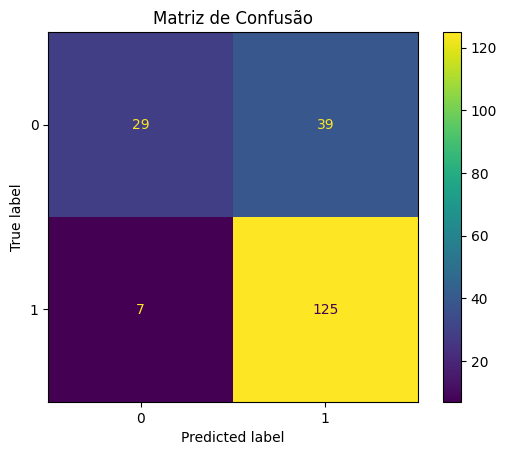

In [42]:
conf_matrix = confusion_matrix(y4_test, y4_pred_test)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Matriz de Confusão')
plt.show()

In [43]:
scores = cross_val_score(logistic_model, X_new, y4, cv=5, scoring='accuracy')

# Calcule a média e o desvio padrão dos scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Exiba os resultados
print(f'Acurácia média na validação cruzada: {mean_score}')
print(f'Desvio padrão da acurácia na validação cruzada: {std_score}')

Acurácia média na validação cruzada: 0.744
Desvio padrão da acurácia na validação cruzada: 0.06843975452907469


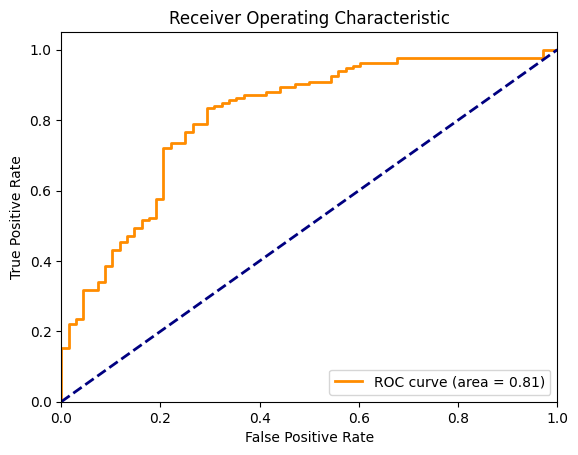

In [44]:
# Calcular a curva ROC
y4_prob = logistic_model.predict_proba(X4_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y4_test, y4_prob)

# Calcular o AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### CASO 5 - TESTE UTILIZANDO SELEÇÃO DE CARACTERÍSTICAS RECURSIVA (RFE)
Este caso de teste apresentou o melhor resultado de todos até o momento, aumentando o TP para 125 e reduzindo o FP para 37 e FN para 7. Neste caso, o melhor resultado foi encontrado utilizado a propriedade "n_features_to_select" com o valor 18, ou seja, quase todas as features. Sequencialmente, reduziu-se a partição de teste para 10% dos dados e aumentou ainda mais a qualidade do modelo, com a curva ROC chegando a AUC de 0.87.

In [45]:
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=1000)  # Aumentar max_iter pode ser necessário às vezes para convergência
X5 = data.drop('Creditability', axis=1)
y5 = data['Creditability']

# Selecionando as top 10 características
rfe = RFE(estimator=model, n_features_to_select=18)
fit = rfe.fit(X5, y5)
X_new2 = fit.transform(X5)

# Imprimir os nomes das características selecionadas
selected_features = [feature for feature, selected in zip(X5.columns, rfe.support_) if selected]
print("Características selecionadas:")
print(selected_features)

Características selecionadas:
['Account_Balance', 'Duration_of_Credit_monthly', 'Payment_Status_of_Previous_Credit', 'Purpose', 'Value_Savings_Stocks', 'Length_of_current_employment', 'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors', 'Duration_in_Current_address', 'Most_valuable_available_asset', 'Concurrent_Credits', 'Type_of_apartment', 'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents', 'Telephone', 'Foreign_Worker']


In [46]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X_new2, y5, test_size=0.1, random_state=0)

In [47]:
model.fit(X5_train, y5_train)

LogisticRegression(max_iter=1000)

In [48]:
y5_pred_train = model.predict(X5_train)
y5_pred_test = model.predict(X5_test)

In [49]:
accuracy_train = accuracy_score(y5_train, y5_pred_train)
accuracy_test = accuracy_score(y5_test, y5_pred_test)

In [50]:
print("Acurácia de treinamento: ", accuracy_train,". Acurácia de teste: ", accuracy_test)

Acurácia de treinamento:  0.7655555555555555 . Acurácia de teste:  0.82


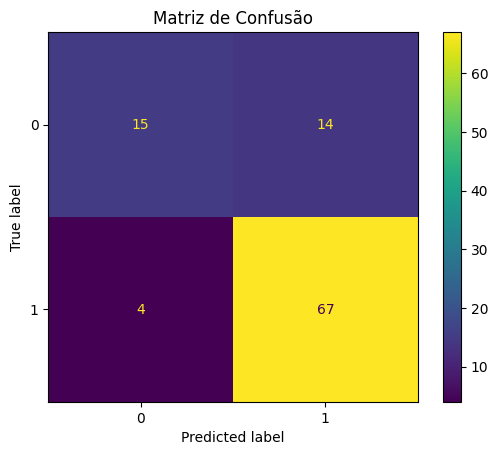

In [51]:
conf_matrix = confusion_matrix(y5_test, y5_pred_test)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Matriz de Confusão')
plt.show()

In [52]:
scores = cross_val_score(logistic_model, X_new2, y5, cv=5, scoring='accuracy')

# Calcule a média e o desvio padrão dos scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Exiba os resultados
print(f'Acurácia média na validação cruzada: {mean_score}')
print(f'Desvio padrão da acurácia na validação cruzada: {std_score}')

Acurácia média na validação cruzada: 0.752
Desvio padrão da acurácia na validação cruzada: 0.08477027781009094


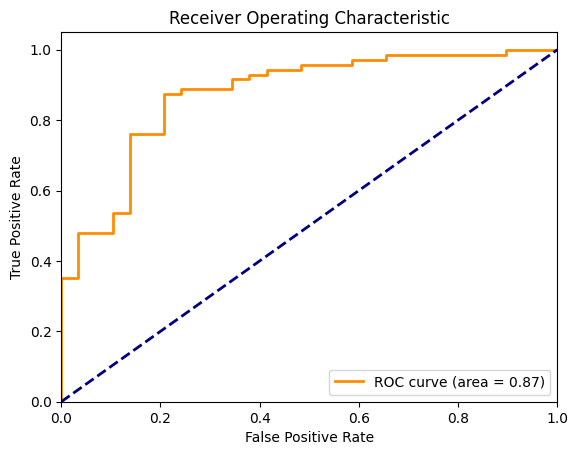

In [53]:
# Calcular a curva ROC
y5_prob = model.predict_proba(X5_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y5_test, y5_prob)

# Calcular o AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### CASO 6 - USO DO SMOTE PARA AUMENTO SINTÉTICO DOS DADOS
Como o teste com a seleção recursiva dos dados sinalizou que o aumento dos dados poderia gerar um resultado melhor, considerando ainda que não é possível aumentar os dados com dados reais, aplicou-se o modelo SMOTE (Synthetic Minority Over-sampling Technique), que permite balancear conjuntos de dados tabulares. Os casos de não fornecimento de crédito representam 30% da base de dados, o que pode gerar problema no treinamento do modelo. Observou-se que houve uma leve melhora na identificação dos FP, mas uma piora na identificação dos FN.

In [55]:
%pip install imblearn

     ---------------------------------------- 0.0/226.0 kB ? eta -:--:--
     -------------------------------------  225.3/226.0 kB 6.7 MB/s eta 0:00:01
     -------------------------------------- 226.0/226.0 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [56]:
from imblearn.over_sampling import SMOTE

X6 = data.drop('Creditability', axis=1)
y6 = data['Creditability']

# Selecionando as top 10 características
rfe = RFE(estimator=model, n_features_to_select=18)
fit = rfe.fit(X6, y6)
X_new3 = fit.transform(X6)

# Imprimir os nomes das características selecionadas
selected_features = [feature for feature, selected in zip(X6.columns, rfe.support_) if selected]
print("Características selecionadas:")
print(selected_features)

# Divida o conjunto de dados em conjuntos de treinamento e validação
X6_train, X6_test, y6_train, y6_test = train_test_split(X_new3, y6, test_size=0.2, random_state=0)

# Aplique o SMOTE apenas no conjunto de treinamento
smote = SMOTE()
X6_train_smote, y6_train_smote = smote.fit_resample(X6_train, y6_train)

# Treine o modelo no conjunto de treinamento aumentado
model = LogisticRegression(max_iter=1000)
model.fit(X6_train_smote, y6_train_smote)

# Valide o modelo no conjunto de validação original
y6_pred_test = model.predict(X6_test)
y6_pred_train = model.predict(X6_train)
# Avalie o desempenho do modelo
# (Use as métricas que você deseja, como acurácia, precisão, recall, F1-score, etc.)


Características selecionadas:
['Account_Balance', 'Duration_of_Credit_monthly', 'Payment_Status_of_Previous_Credit', 'Purpose', 'Value_Savings_Stocks', 'Length_of_current_employment', 'Instalment_per_cent', 'Sex_Marital_Status', 'Guarantors', 'Duration_in_Current_address', 'Most_valuable_available_asset', 'Concurrent_Credits', 'Type_of_apartment', 'No_of_Credits_at_this_Bank', 'Occupation', 'No_of_dependents', 'Telephone', 'Foreign_Worker']


In [57]:
accuracy_train = accuracy_score(y6_train, y6_pred_train)
accuracy_test = accuracy_score(y6_test, y6_pred_test)

In [58]:
print("Acurácia de treinamento: ", accuracy_train,". Acurácia de teste: ", accuracy_test)

Acurácia de treinamento:  0.7375 . Acurácia de teste:  0.77


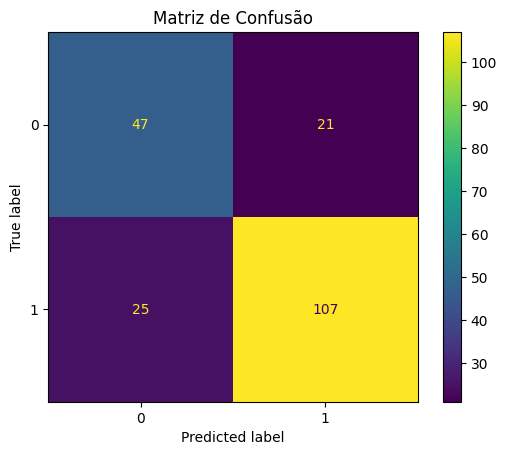

In [59]:
conf_matrix = confusion_matrix(y6_test, y6_pred_test)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Matriz de Confusão')
plt.show()

In [60]:
scores = cross_val_score(logistic_model, X_new3, y6, cv=5, scoring='accuracy')

# Calcule a média e o desvio padrão dos scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Exiba os resultados
print(f'Acurácia média na validação cruzada: {mean_score}')
print(f'Desvio padrão da acurácia na validação cruzada: {std_score}')

Acurácia média na validação cruzada: 0.752
Desvio padrão da acurácia na validação cruzada: 0.08477027781009094


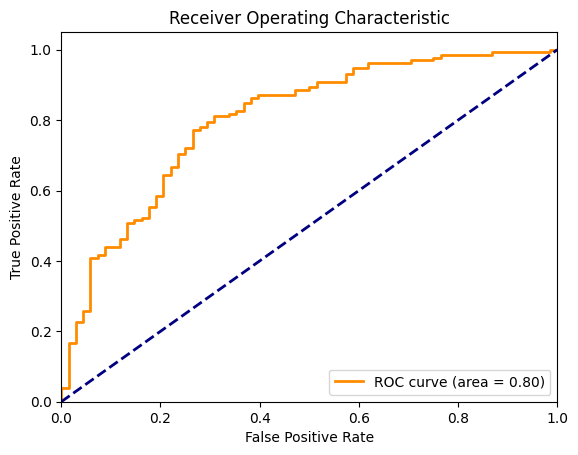

In [61]:
# Calcular a curva ROC
y6_prob = model.predict_proba(X6_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y6_test, y6_prob)

# Calcular o AUC
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()